In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_path = "drive/MyDrive/mini_project7_RNN/data"

In [ ]:
train = pd.read_csv(f"{base_path}/train.csv")
train = train.drop(columns="ID")
print(train.shape)
train.head(2)

(16541, 6)


,문장,유형,극성,시제,확실성,label
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실


In [ ]:
test = pd.read_csv(f"{base_path}/test.csv")
test = test.drop(columns="ID")
print(test.shape)
test.head(2)

(7090, 1)


,문장
0,"장욱진의 ＇가족＇은 허물 없는 가족애를, 처음 공개되는 정약용의 ＇정효자전＇과 ＇정..."
1,"조지 W 부시, 버락 오바마 전 대통령도 전쟁 위험 때문에 버린 카드다."


In [ ]:
train["유형"].value_counts()

사실형    13558
추론형     2151
대화형      575
예측형      257
Name: 유형, dtype: int64

In [ ]:
train["극성"].value_counts()

긍정    15793
부정      565
미정      183
Name: 극성, dtype: int64

In [ ]:
train["시제"].value_counts()

과거    8032
현재    6866
미래    1643
Name: 시제, dtype: int64

In [ ]:
train["확실성"].value_counts()

확실     15192
불확실     1349
Name: 확실성, dtype: int64

In [ ]:
pd.set_option("display.max_rows", 100)

In [ ]:
# 중복된 데이터 찾기

# 문장과 label이 같은 데이터
train[train.duplicated(["문장", "label"], keep=False)]

,문장,유형,극성,시제,확실성,label
300,신용카드 빚을 뜻하는 판매신용은 2조4000억원 늘어난 91조1000억원이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
335,급한대로 예매가 가능한 날짜의 표를 구매한 뒤 다른 사람과 바꾸려는 수요다.,추론형,긍정,현재,확실,추론형-긍정-현재-확실
438,자신의 남동생인 이재현 CJ 회장에게는 ＂불가능한 꿈일지라도 언제나 우리가 꿈을 꿀...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
635,"5일 한국은행에 따르면 작년 9월말 가계대출, 개인사업자대출, 판매신용 잔액은 석 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
831,회당 300t가량의 물이 사용되는 것으로 알려졌다.,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실
1152,3년 만에 돌아온 ＇싸이 흠뻑쇼＇가 물 낭비와 위생 논란에도 건재함을 과시했다.,사실형,긍정,과거,확실,사실형-긍정-과거-확실
1344,그는 ＂일종의 피해망상인데 검찰이 압수수색을 해서 증거를 왜곡할 수 있다는 이런 말...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
1561,《목민심서》의 내용이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1563,"미국은 음주운전으로 면허취소된 운전자가 운전면허를 재취득할 경우, 일정 혈중알코올농...",사실형,긍정,현재,확실,사실형-긍정-현재-확실
1638,신용카드 빚을 뜻하는 판매신용은 2조4000억원 늘어난 91조1000억원이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실


In [ ]:
# 문장과 label이 모두 같은 데이터에서 중복값 삭제
train = train.drop_duplicates(["문장", "label"], keep="first")

In [ ]:
# 문장은 같으나 label이 다른 데이터
train[train.duplicated(["문장"], keep=False)]

,문장,유형,극성,시제,확실성,label
208,박근혜 정권에서 블랙리스트에 올라 지난 2014년 타의로 미국으로 떠난 이 부회장은...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실
2108,직접적으로 암 덩어리를 없애거나 크기를 줄이고 암세포를 죽이기 위한 치료다.,사실형,긍정,현재,불확실,사실형-긍정-현재-불확실
3364,박근혜 정권에서 블랙리스트에 올라 지난 2014년 타의로 미국으로 떠난 이 부회장은...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
4670,이들 게임은 국내 구글 플레이 매출 톱10 진입이 예상되는 기대작이다.,추론형,긍정,미래,불확실,추론형-긍정-미래-불확실
7099,이들 게임은 국내 구글 플레이 매출 톱10 진입이 예상되는 기대작이다.,예측형,긍정,현재,불확실,예측형-긍정-현재-불확실
7269,각 레이스가 종료되면 ＇우마무스메＇들이 무대에 올라 눈과 귀를 즐겁게하는 공연을 펼친다.,사실형,긍정,미래,확실,사실형-긍정-미래-확실
14989,각 레이스가 종료되면 ＇우마무스메＇들이 무대에 올라 눈과 귀를 즐겁게하는 공연을 펼친다.,사실형,긍정,현재,불확실,사실형-긍정-현재-불확실
15167,직접적으로 암 덩어리를 없애거나 크기를 줄이고 암세포를 죽이기 위한 치료다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실


In [ ]:
# 문장은 같으나 label이 다른 데이터 => 모두 삭제
train = train.drop(index=train[train.duplicated(["문장"], keep=False)].index)
train = train.reset_index()
train.shape

(16502, 7)

In [ ]:
X = train["문장"]
type_y = train["유형"]
polarity_y = train["극성"]
tense_y = train["시제"]
certainty_y = train["확실성"]

In [ ]:
# # # vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(min_df=4, analyzer='word', ngram_range=(1, 2))
# vectorizer.fit(X)

# X_train = vectorizer.transform(X)
# test = vectorizer.transform(test)

# X_train.shape, test.shape

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 100
oov_tok = "<oov>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(X)

train_sequence = tokenizer.texts_to_sequences(X)
test_sequence = tokenizer.texts_to_sequences(test["문장"])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_sp = pad_sequences(train_sequence, maxlen=100)
test_sp = pad_sequences(test_sequence, maxlen=100)

In [ ]:
# # Label Encoding (유형, 극성, 시제, 확실성)
# from sklearn.preprocessing import LabelEncoder

# type_le = LabelEncoder()
# type_y = type_le.fit_transform(type_y.values)

# polarity_le = LabelEncoder()
# polarity_y = polarity_le.fit_transform(polarity_y.values)

# tense_le  = LabelEncoder()
# tense_y = tense_le.fit_transform(tense_y.values)

# certainty_le  = LabelEncoder()
# certainty_y = certainty_le.fit_transform(certainty_y.values)

In [ ]:
# one-hot encoding
type_y = pd.get_dummies(type_y)
polarity_y = pd.get_dummies(polarity_y)
tense_y = pd.get_dummies(tense_y)
certainty_y = pd.get_dummies(certainty_y)

In [ ]:
type_y.shape, polarity_y.shape, tense_y.shape, certainty_y.shape

((16502, 4), (16502, 3), (16502, 3), (16502, 2))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, GRU, Bidirectional, LSTM, Dropout

### 유형

In [ ]:
model = tf.keras.Sequential()

model.add(Embedding(input_dim=100,
                    output_dim=64,
                    input_length=100))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(GRU(units=64))

model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           6400      
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         49920     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 128)         74496     
 nal)                                                            
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 168,324
Trainable params: 168,324
Non-trai

In [ ]:
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics="accuracy")

In [ ]:
# 유형
from sklearn.model_selection import train_test_split

X_train_type, X_val_type, y_train_type, y_val_type = train_test_split(
    train_sp, type_y, test_size=0.2, random_state=42, stratify=type_y)

X_train_type.shape, X_val_type.shape, y_train_type.shape, y_val_type.shape

((13201, 100), (3301, 100), (13201, 4), (3301, 4))

In [ ]:
# 유형
type_history = model.fit(X_train_type, y_train_type,
                    validation_data=(X_val_type, y_val_type),
                    epochs=100, callbacks=[early_stop])

Epoch 1/100
413/413 [==============================] - 137s 307ms/step - loss: 0.5817 - accuracy: 0.8230 - val_loss: 0.5551 - val_accuracy: 0.8252
Epoch 2/100
413/413 [==============================] - 125s 302ms/step - loss: 0.5315 - accuracy: 0.8299 - val_loss: 0.5288 - val_accuracy: 0.8310
Epoch 3/100
413/413 [==============================] - 125s 303ms/step - loss: 0.5232 - accuracy: 0.8298 - val_loss: 0.5185 - val_accuracy: 0.8304
Epoch 4/100
413/413 [==============================] - 125s 302ms/step - loss: 0.5197 - accuracy: 0.8314 - val_loss: 0.5299 - val_accuracy: 0.8294
Epoch 5/100
413/413 [==============================] - 126s 304ms/step - loss: 0.5148 - accuracy: 0.8318 - val_loss: 0.5293 - val_accuracy: 0.8319
Epoch 6/100
413/413 [==============================] - 125s 303ms/step - loss: 0.5135 - accuracy: 0.8322 - val_loss: 0.5197 - val_accuracy: 0.8313
Epoch 7/100
413/413 [==============================] - 125s 302ms/step - loss: 0.5104 - accuracy: 0.8322 - val_loss: 0

In [ ]:
type_df = pd.DataFrame(type_history.history)
type_df

,loss,accuracy,val_loss,val_accuracy
0,0.581703,0.822968,0.555122,0.825204
1,0.531503,0.829937,0.528843,0.830960
2,0.523234,0.829786,0.518497,0.830354
3,0.519749,0.831376,0.529868,0.829446
4,0.514782,0.831755,0.529279,0.831869
5,0.513536,0.832210,0.519724,0.831263
6,0.510425,0.832210,0.517287,0.831263
7,0.507930,0.831376,0.522592,0.826719
8,0.505466,0.831376,0.515974,0.831566
9,0.502791,0.832967,0.518854,0.830051


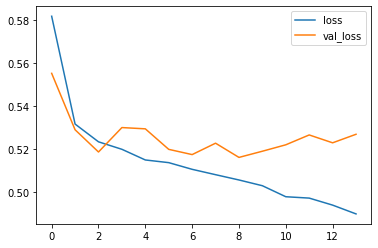

In [ ]:
type_df[["loss", "val_loss"]].plot();

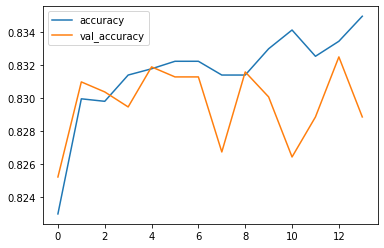

In [ ]:
type_df[["accuracy", "val_accuracy"]].plot();

In [ ]:
model.evaluate(X_val_type, y_val_type)

104/104 [==============================] - 7s 65ms/step - loss: 0.5160 - accuracy: 0.8316


[0.5159744024276733, 0.8315662145614624]

In [ ]:
y_pred_type = model.predict(test_sp)

222/222 [==============================] - 16s 65ms/step


In [ ]:
y_predict_type = np.argmax(y_pred_type, axis=1)
y_predict_type

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
type_dict = {0 : "대화형",
             1 : "사실형",
             2 : "예측형",
             3 : "추론형"}

In [ ]:
pd.Series(y_predict_type).value_counts()

1    6876
3     107
0      97
2      10
dtype: int64

In [ ]:
type = pd.Series(y_predict_type).map(type_dict)
type

0       사실형
1       사실형
2       사실형
3       사실형
4       사실형
       ... 
7085    사실형
7086    사실형
7087    사실형
7088    사실형
7089    사실형
Length: 7090, dtype: object

### 극성

In [ ]:
model = tf.keras.Sequential()

model.add(Embedding(input_dim=100,
                    output_dim=64,
                    input_length=100))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(GRU(units=64))

model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           6400      
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 128)         49920     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 128)         74496     
 nal)                                                            
                                                                 
 gru_5 (GRU)                 (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 168,259
Trainable params: 168,259
Non-tr

In [ ]:
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics="accuracy")

In [ ]:
# 극성
X_train_polarity, X_val_polarity, y_train_polarity, y_val_polarity = train_test_split(
    train_sp, polarity_y, test_size=0.2, random_state=42, stratify=polarity_y)

X_train_polarity.shape, X_val_polarity.shape, y_train_polarity.shape, y_val_polarity.shape

((13201, 100), (3301, 100), (13201, 3), (3301, 3))

In [ ]:
# 극성
polarity_history = model.fit(X_train_polarity, y_train_polarity,
                    validation_data=(X_val_polarity, y_val_polarity),
                    epochs=100, callbacks=[early_stop])

Epoch 1/100
413/413 [==============================] - 137s 310ms/step - loss: 0.2232 - accuracy: 0.9525 - val_loss: 0.1991 - val_accuracy: 0.9546
Epoch 2/100
413/413 [==============================] - 126s 306ms/step - loss: 0.1994 - accuracy: 0.9548 - val_loss: 0.2032 - val_accuracy: 0.9546
Epoch 3/100
413/413 [==============================] - 125s 304ms/step - loss: 0.1972 - accuracy: 0.9545 - val_loss: 0.1999 - val_accuracy: 0.9546
Epoch 4/100
413/413 [==============================] - 125s 303ms/step - loss: 0.1944 - accuracy: 0.9549 - val_loss: 0.1958 - val_accuracy: 0.9552
Epoch 5/100
413/413 [==============================] - 126s 304ms/step - loss: 0.1949 - accuracy: 0.9544 - val_loss: 0.1961 - val_accuracy: 0.9552
Epoch 6/100
413/413 [==============================] - 126s 305ms/step - loss: 0.1922 - accuracy: 0.9547 - val_loss: 0.1961 - val_accuracy: 0.9543
Epoch 7/100
413/413 [==============================] - 125s 303ms/step - loss: 0.1913 - accuracy: 0.9549 - val_loss: 0

In [ ]:
polarity_df = pd.DataFrame(polarity_history.history)
polarity_df

,loss,accuracy,val_loss,val_accuracy
0,0.223173,0.952504,0.199076,0.954559
1,0.199388,0.954776,0.203231,0.954559
2,0.197233,0.954549,0.199941,0.954559
3,0.194385,0.954928,0.195827,0.955165
4,0.194863,0.954397,0.196067,0.955165
5,0.192193,0.954700,0.196054,0.954256
6,0.191349,0.954852,0.200898,0.954559
7,0.189895,0.954700,0.200873,0.954559
8,0.188385,0.955079,0.203199,0.954256


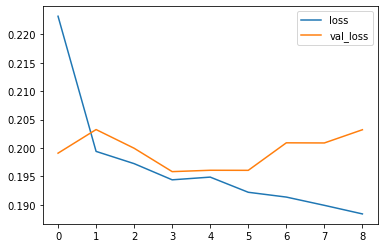

In [ ]:
polarity_df[["loss", "val_loss"]].plot();

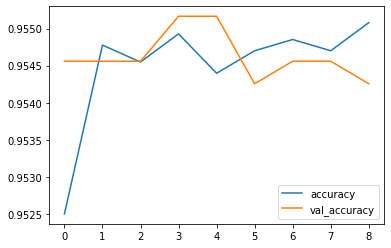

In [ ]:
polarity_df[["accuracy", "val_accuracy"]].plot();

In [ ]:
model.evaluate(X_val_polarity, y_val_polarity)

104/104 [==============================] - 7s 67ms/step - loss: 0.1958 - accuracy: 0.9552


[0.1958267241716385, 0.9551650881767273]

In [ ]:
y_pred_polarity = model.predict(test_sp)

222/222 [==============================] - 17s 68ms/step


In [ ]:
y_predict_polarity = np.argmax(y_pred_polarity, axis=1)
y_predict_polarity

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
polarity_dict = {0 : "긍정",
             1 : "미정",
             2 : "부정"}

In [ ]:
polarity = pd.Series(y_predict_polarity).map(polarity_dict)
polarity

0       긍정
1       긍정
2       긍정
3       긍정
4       긍정
        ..
7085    긍정
7086    긍정
7087    긍정
7088    긍정
7089    긍정
Length: 7090, dtype: object

### 시제

In [ ]:
model = tf.keras.Sequential()

model.add(Embedding(input_dim=100,
                    output_dim=64,
                    input_length=100))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(GRU(units=64))

model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           6400      
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 128)         49920     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 100, 128)         74496     
 nal)                                                            
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 168,259
Trainable params: 168,259
Non-tr

In [ ]:
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics="accuracy")

In [ ]:
# 시제
X_train_tense, X_val_tense, y_train_tense, y_val_tense = train_test_split(
    train_sp, tense_y, test_size=0.2, random_state=42, stratify=tense_y)

X_train_tense.shape, X_val_tense.shape, y_train_tense.shape, y_val_tense.shape

((13201, 100), (3301, 100), (13201, 3), (3301, 3))

In [ ]:
# 시제
tense_history = model.fit(X_train_tense, y_train_tense,
                    validation_data=(X_val_tense, y_val_tense),
                    epochs=100, callbacks=[early_stop])

Epoch 1/100
413/413 [==============================] - 138s 311ms/step - loss: 0.8505 - accuracy: 0.5749 - val_loss: 0.8047 - val_accuracy: 0.6062
Epoch 2/100
413/413 [==============================] - 125s 303ms/step - loss: 0.8050 - accuracy: 0.6100 - val_loss: 0.7921 - val_accuracy: 0.6207
Epoch 3/100
413/413 [==============================] - 126s 305ms/step - loss: 0.7837 - accuracy: 0.6179 - val_loss: 0.7683 - val_accuracy: 0.6189
Epoch 4/100
413/413 [==============================] - 126s 306ms/step - loss: 0.7746 - accuracy: 0.6209 - val_loss: 0.7676 - val_accuracy: 0.6222
Epoch 5/100
413/413 [==============================] - 126s 305ms/step - loss: 0.7688 - accuracy: 0.6267 - val_loss: 0.7693 - val_accuracy: 0.6231
Epoch 6/100
413/413 [==============================] - 126s 306ms/step - loss: 0.7658 - accuracy: 0.6287 - val_loss: 0.7718 - val_accuracy: 0.6168
Epoch 7/100
413/413 [==============================] - 126s 306ms/step - loss: 0.7619 - accuracy: 0.6288 - val_loss: 0

In [ ]:
tense_df = pd.DataFrame(tense_history.history)
tense_df

,loss,accuracy,val_loss,val_accuracy
0,0.850456,0.574881,0.804712,0.606180
1,0.805000,0.610030,0.792118,0.620721
2,0.783673,0.617908,0.768311,0.618903
3,0.774622,0.620862,0.767603,0.622236
4,0.768850,0.626695,0.769333,0.623145
5,0.765828,0.628740,0.771801,0.616783
6,0.761932,0.628816,0.771750,0.622236
7,0.759557,0.633967,0.769638,0.622539
8,0.756111,0.637149,0.777653,0.617389


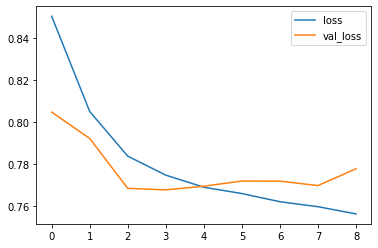

In [ ]:
tense_df[["loss", "val_loss"]].plot();

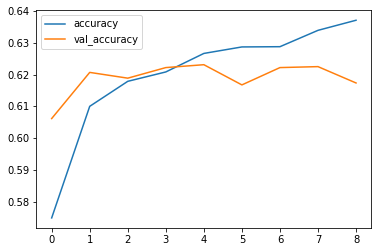

In [ ]:
tense_df[["accuracy", "val_accuracy"]].plot();

In [ ]:
model.evaluate(X_val_tense, y_val_tense)

104/104 [==============================] - 8s 73ms/step - loss: 0.7676 - accuracy: 0.6222


[0.767602801322937, 0.6222357153892517]

In [ ]:
y_pred_tense = model.predict(test_sp)

222/222 [==============================] - 18s 74ms/step


In [ ]:
y_predict_tense= np.argmax(y_pred_tense, axis=1)
y_predict_tense

array([0, 2, 0, ..., 2, 1, 2])

In [ ]:
tense_dict = {0 : "과거",
             1 : "미래",
             2 : "현재"}

In [ ]:
tense = pd.Series(y_predict_tense).map(tense_dict)
tense

0       과거
1       현재
2       과거
3       과거
4       과거
        ..
7085    과거
7086    현재
7087    현재
7088    미래
7089    현재
Length: 7090, dtype: object

### 확실성

In [ ]:
model = tf.keras.Sequential()

model.add(Embedding(input_dim=100,
                    output_dim=64,
                    input_length=100))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(GRU(units=64))

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           6400      
                                                                 
 bidirectional_6 (Bidirectio  (None, 100, 128)         49920     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 100, 128)         74496     
 nal)                                                            
                                                                 
 gru_11 (GRU)                (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 168,194
Trainable params: 168,194
Non-tr

In [ ]:
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics="accuracy")

In [ ]:
# 확실성
X_train_certainty, X_val_certainty, y_train_certainty, y_val_certainty = train_test_split(
    train_sp, certainty_y, test_size=0.2, random_state=42, stratify=certainty_y)

X_train_certainty.shape, X_val_certainty.shape, y_train_certainty.shape, y_val_certainty.shape

((13201, 100), (3301, 100), (13201, 2), (3301, 2))

In [ ]:
# 확실성
certainty_history = model.fit(X_train_certainty, y_train_certainty,
                    validation_data=(X_val_certainty, y_val_certainty),
                    epochs=100, callbacks=[early_stop])

Epoch 1/100
413/413 [==============================] - 140s 316ms/step - loss: 0.2674 - accuracy: 0.9160 - val_loss: 0.2640 - val_accuracy: 0.9188
Epoch 2/100
413/413 [==============================] - 126s 305ms/step - loss: 0.2561 - accuracy: 0.9190 - val_loss: 0.2624 - val_accuracy: 0.9188
Epoch 3/100
413/413 [==============================] - 125s 302ms/step - loss: 0.2537 - accuracy: 0.9190 - val_loss: 0.2660 - val_accuracy: 0.9188
Epoch 4/100
413/413 [==============================] - 125s 303ms/step - loss: 0.2517 - accuracy: 0.9192 - val_loss: 0.2700 - val_accuracy: 0.9155
Epoch 5/100
413/413 [==============================] - 125s 303ms/step - loss: 0.2508 - accuracy: 0.9199 - val_loss: 0.2602 - val_accuracy: 0.9185
Epoch 6/100
413/413 [==============================] - 126s 305ms/step - loss: 0.2475 - accuracy: 0.9207 - val_loss: 0.2660 - val_accuracy: 0.9176
Epoch 7/100
413/413 [==============================] - 125s 302ms/step - loss: 0.2472 - accuracy: 0.9193 - val_loss: 0

In [ ]:
certainty_df = pd.DataFrame(certainty_history.history)
certainty_df

,loss,accuracy,val_loss,val_accuracy
0,0.267384,0.915991,0.263971,0.918812
1,0.256099,0.919021,0.262411,0.918812
2,0.253704,0.919021,0.265984,0.918812
3,0.251695,0.919249,0.269996,0.915480
4,0.250838,0.919855,0.260165,0.918510
5,0.247486,0.920688,0.265988,0.917601
6,0.247195,0.919324,0.263948,0.915177
7,0.245990,0.919779,0.269623,0.915783
8,0.245749,0.920612,0.272933,0.916692
9,0.246023,0.920385,0.261342,0.919721


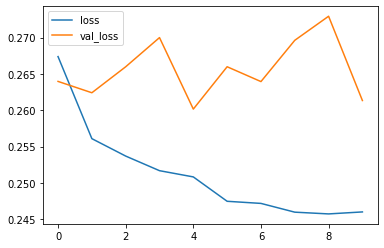

In [ ]:
certainty_df[["loss", "val_loss"]].plot();

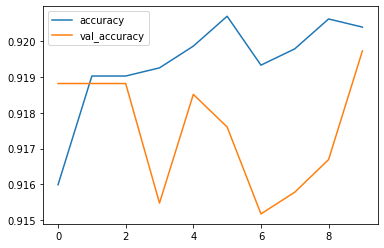

In [ ]:
certainty_df[["accuracy", "val_accuracy"]].plot();

In [ ]:
model.evaluate(X_val_certainty, y_val_certainty)

104/104 [==============================] - 7s 66ms/step - loss: 0.2602 - accuracy: 0.9185


[0.26016488671302795, 0.9185095429420471]

In [ ]:
y_pred_certainty = model.predict(test_sp)

222/222 [==============================] - 18s 66ms/step


In [ ]:
y_predict_certainty= np.argmax(y_pred_certainty, axis=1)
y_predict_certainty

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pd.Series(y_predict_certainty).value_counts()

1    7077
0      13
dtype: int64

In [ ]:
certainty_dict = {0 : "불확실",
             1 : "확실"}

In [ ]:
certainty = pd.Series(y_predict_certainty).map(certainty_dict)
certainty

0       확실
1       확실
2       확실
3       확실
4       확실
        ..
7085    확실
7086    확실
7087    확실
7088    확실
7089    확실
Length: 7090, dtype: object

### 제출

In [ ]:
submission = pd.read_csv(f"{base_path}/sample_submission.csv")
print(submission.shape)
submission.head()

(7090, 2)


,ID,label
0,TEST_0000,추론형-긍정-현재-확실
1,TEST_0001,추론형-긍정-현재-확실
2,TEST_0002,추론형-긍정-현재-확실
3,TEST_0003,추론형-긍정-현재-확실
4,TEST_0004,추론형-긍정-현재-확실


In [ ]:
# 예측값 label 만들기
submission["label"] = type + "-" + polarity + "-" + tense + "-" + certainty
submission.head()

,ID,label
0,TEST_0000,사실형-긍정-과거-확실
1,TEST_0001,사실형-긍정-현재-확실
2,TEST_0002,사실형-긍정-과거-확실
3,TEST_0003,사실형-긍정-과거-확실
4,TEST_0004,사실형-긍정-과거-확실


In [ ]:
submission.to_csv(f"{base_path}/GRU1.csv", index=False)
pd.read_csv(f"{base_path}/GRU1.csv")

,ID,label
0,TEST_0000,사실형-긍정-과거-확실
1,TEST_0001,사실형-긍정-현재-확실
2,TEST_0002,사실형-긍정-과거-확실
3,TEST_0003,사실형-긍정-과거-확실
4,TEST_0004,사실형-긍정-과거-확실
...,...,...
7085,TEST_7085,사실형-긍정-과거-확실
7086,TEST_7086,사실형-긍정-현재-확실
7087,TEST_7087,사실형-긍정-현재-확실
7088,TEST_7088,사실형-긍정-미래-확실
